In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


## Raw Data to processed Data

In [ ]:
xls = pd.ExcelFile("/content/drive/MyDrive/hotfoot/Dataset/Daily-wise data/PSDDP04062020.xlsx")

In [ ]:
print(xls.sheet_names)

['June 2020', 'July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 'January 2021', 'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021', 'July 2021', 'August 2021', 'September 2021', 'October 2021', 'November 2021', 'December 2021', 'January 2022 ', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022', 'January 2023', 'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023', 'July 2023', 'August 2023', 'September 2023', 'October 2023', 'November 2023', 'December 2023', 'January 2024', 'February 2024', 'March 2024', 'April 2024', 'May 2024', 'June 2024', 'July 2024', 'August 2024', 'September 2024', 'October 2024', 'November 2024', 'December 2024', 'January 2025', 'February 2025', 'March 2025', 'April 2025', 'May 2025', 'June 2025', 'July 2025', 'August 2025', 'September 2025', 'October 2025', 'November 202

In [ ]:
cleaned_sheets = {}

for sheet in xls.sheet_names:
    df = pd.read_excel(
        xls,
        sheet_name=sheet,
        header=[0, 1, 2, 3, 4]
    )

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.droplevel([0, 1, 2, 3])

    cleaned_sheets[sheet] = df


In [ ]:
for sheet, df in cleaned_sheets.items():
    print(f"Sheet: {sheet}")
    print(list(df.columns))


Sheet: June 2020
['Unnamed: 0_level_4', 'RTGS', 'RTGS.1', 'NEFT', 'NEFT.1', 'AePS', 'AePS.1', 'UPI', 'UPI.1', 'IMPS', 'IMPS.1', 'NACH Credit', 'NACH Credit.1', 'NACH Debit', 'NACH Debit.1', 'NETC', 'NETC.1', 'BBPS', 'BBPS.1', 'CTS', 'CTS.1', 'NFS (through ATMs)', 'NFS (through ATMs)', 'AePS (through micro-ATMs / BCs)', 'AePS (through micro-ATMs / BCs)']
Sheet: July 2020
['Unnamed: 0_level_4', 'RTGS', 'RTGS.1', 'NEFT', 'NEFT.1', 'AePS', 'AePS.1', 'UPI', 'UPI.1', 'IMPS', 'IMPS.1', 'NACH Credit', 'NACH Credit.1', 'NACH Debit', 'NACH Debit.1', 'NETC', 'NETC.1', 'BBPS', 'BBPS.1', 'CTS', 'CTS.1', 'NFS (through ATMs)', 'NFS (through ATMs)', 'AePS (through micro-ATMs / BCs)', 'AePS (through micro-ATMs / BCs)']
Sheet: August 2020
['Unnamed: 0_level_4', 'RTGS', 'RTGS.1', 'NEFT', 'NEFT.1', 'AePS', 'AePS.1', 'UPI', 'UPI.1', 'IMPS', 'IMPS.1', 'NACH Credit', 'NACH Credit.1', 'NACH Debit', 'NACH Debit.1', 'NETC', 'NETC.1', 'BBPS', 'BBPS.1', 'CTS', 'CTS.1', 'NFS (through ATMs)', 'NFS (through ATMs)', 

In [ ]:
cols_to_keep = ["Unnamed: 0_level_4","UPI", "UPI.1"]


In [ ]:
upi_only_sheets = {}

for sheet, df in cleaned_sheets.items():
    existing_cols = [c for c in cols_to_keep if c in df.columns]

    if existing_cols:
        upi_only_sheets[sheet] = df[existing_cols]
    else:
        print(f"{sheet}")


In [ ]:
for sheet, df in upi_only_sheets.items():
    print(f"{sheet} → columns: {list(df.columns)}")


June 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
July 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
August 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
September 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
October 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
November 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
December 2020 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
January 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
February 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
March 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
April 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
May 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
June 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
July 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
August 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
September 2021 → columns: ['Unnamed: 0_level_4', 'UPI', 'UPI.1']
October

In [ ]:
rename_map = {"Unnamed: 0_level_4" : "date","UPI": "upi_volume","UPI.1": "upi_value"}

for sheet, df in upi_only_sheets.items():
    upi_only_sheets[sheet] = df.rename(columns=rename_map)


In [ ]:
for sheet, df in upi_only_sheets.items():
    print(f"{sheet}: {list(df.columns)}")


June 2020: ['date', 'upi_volume', 'upi_value']
July 2020: ['date', 'upi_volume', 'upi_value']
August 2020: ['date', 'upi_volume', 'upi_value']
September 2020: ['date', 'upi_volume', 'upi_value']
October 2020: ['date', 'upi_volume', 'upi_value']
November 2020: ['date', 'upi_volume', 'upi_value']
December 2020: ['date', 'upi_volume', 'upi_value']
January 2021: ['date', 'upi_volume', 'upi_value']
February 2021: ['date', 'upi_volume', 'upi_value']
March 2021: ['date', 'upi_volume', 'upi_value']
April 2021: ['date', 'upi_volume', 'upi_value']
May 2021: ['date', 'upi_volume', 'upi_value']
June 2021: ['date', 'upi_volume', 'upi_value']
July 2021: ['date', 'upi_volume', 'upi_value']
August 2021: ['date', 'upi_volume', 'upi_value']
September 2021: ['date', 'upi_volume', 'upi_value']
October 2021: ['date', 'upi_volume', 'upi_value']
November 2021: ['date', 'upi_volume', 'upi_value']
December 2021: ['date', 'upi_volume', 'upi_value']
January 2022 : ['date', 'upi_volume', 'upi_value']
February 202

In [ ]:
sheet_name = list(upi_only_sheets.keys())[0]
upi_only_sheets[sheet_name].head()


,date,upi_volume,upi_value
0,NaN,Vol,Val
1,"June 1, 2020",476.9671,10413.108975
2,"June 2, 2020",476.78182,9951.298586
3,"June 3, 2020",456.2593,9622.375213
4,"June 4, 2020",463.04959,9639.502869


In [ ]:
for sheet, df in upi_only_sheets.items():
    if 0 in df.index:
        upi_only_sheets[sheet] = df.drop(index=0)


In [ ]:
for sheet, df in upi_only_sheets.items():
    print(f"{sheet} → shape after deleting row: {df.shape}")
    display(df.head(40))


June 2020 → shape after deleting row: (42, 3)


,date,upi_volume,upi_value
1,"June 1, 2020",476.9671,10413.108975
2,"June 2, 2020",476.78182,9951.298586
3,"June 3, 2020",456.2593,9622.375213
4,"June 4, 2020",463.04959,9639.502869
5,"June 5, 2020",464.79398,9539.524729
6,"June 6, 2020",458.64927,9119.199542
7,"June 7, 2020",427.25912,6874.9973
8,"June 8, 2020",469.99287,10062.170486
9,"June 9, 2020",466.98338,9786.857657
10,"June 10, 2020",461.58058,9839.410284


July 2020 → shape after deleting row: (42, 3)


,date,upi_volume,upi_value
1,"July 1, 2020",515.18,11611.71
2,"July 2, 2020",481.96,10494.44
3,"July 3, 2020",507.41,10735.45
4,"July 4, 2020",498.77,10114.58
5,"July 5, 2020",432.52,7115.05
6,"July 6, 2020",503.34,10863
7,"July 7, 2020",496.02,10438.01
8,"July 8, 2020",509.11,10642.44
9,"July 9, 2020",485.14,10059.96
10,"July 10, 2020",451.5,9324.23


August 2020 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,"August 1, 2020",554.43,10981.35
2,"August 2, 2020",501.86,8082.04
3,"August 3, 2020",508.98,9804.57
4,"August 4, 2020",526.55,11230.53
5,"August 5, 2020",492.26,10226.47
6,"August 6, 2020",459.74,9517.22
7,"August 7, 2020",504.21,10464.83
8,"August 8, 2020",538.93,9938.8
9,"August 9, 2020",440.12,6578.76
10,"August 10, 2020",511.87,10388.9


September 2020 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,"September 1, 2020",651.97,13916.88
2,"September 2, 2020",638.42,13151.17
3,"September 3, 2020",625.8,12827.3
4,"September 4, 2020",621.85,12457.52
5,"September 5, 2020",624.89,12215.88
6,"September 6, 2020",567.97,8642.76
7,"September 7, 2020",634.74,13010.41
8,"September 8, 2020",662.23,12601.81
9,"September 9, 2020",571.75,11563.73
10,"September 10, 2020",646.68,12688.59


October 2020 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,"October 1, 2020",690.78,15154.61
2,"October 2, 2020",668.2,12182.05
3,"October 3, 2020",660.31,12936.91
4,"October 4, 2020",621.62,10048.45
5,"October 5, 2020",662,14138.9
6,"October 6, 2020",663.59,13442.54
7,"October 7, 2020",707.29,13835.59
8,"October 8, 2020",700.44,13802.48
9,"October 9, 2020",703.69,13478.59
10,"October 10, 2020",679.11,11765.56


November 2020 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,"November 1, 2020",719.36,11976.23
2,"November 2, 2020",772.71,16403.19
3,"November 3, 2020",765.2,15169.76
4,"November 4, 2020",762.26,15271.56
5,"November 5, 2020",726.68,13736.53
6,"November 6, 2020",775.2,14875.48
7,"November 7, 2020",780.74,14334.9
8,"November 8, 2020",772.49,11178.77
9,"November 9, 2020",748.79,14434.11
10,"November 10, 2020",837.68,15796.87


December 2020 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,"December 1, 2020",716.24,15048.41
2,"December 2, 2020",692.08,14400.62
3,"December 3, 2020",634.55,12916.16
4,"December 4, 2020",761.09,16061.54
5,"December 5, 2020",776.24,16093.79
6,"December 6, 2020",706.27,11486.81
7,"December 7, 2020",755.12,15716.32
8,"December 8, 2020",574.97,9967.03
9,"December 9, 2020",791.01,16560.21
10,"December 10, 2020",763.53,15404.8


January 2021 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,"January 1, 2021",767.15,14291.54
2,"January 2, 2021",792.19,16441.23
3,"January 3, 2021",712.39,11999.27
4,"January 4, 2021",797.78,17216.59
5,"January 5, 2021",782.2,16391.11
6,"January 06, 2021",795.3,16315.32
7,"January 07, 2021",786.63,15903.99
8,"January 08, 2021",765.97,15067.11
9,"January 09, 2021",755.92,13575.18
10,"January 10, 2021",730.55,11442.15


February 2021 → shape after deleting row: (41, 3)


,date,upi_volume,upi_value
1,2021-02-01 00:00:00,835.85,18468.88
2,2021-02-02 00:00:00,817.28,17017.33
3,2021-02-03 00:00:00,809.71,16419.83
4,2021-02-04 00:00:00,813.15,16525.55
5,2021-02-05 00:00:00,846,16576.05
6,2021-02-06 00:00:00,859.11,16381.84
7,2021-02-07 00:00:00,812.38,12158.01
8,2021-02-08 00:00:00,830.29,16526.49
9,2021-02-09 00:00:00,851.58,16665.88
10,2021-02-10 00:00:00,863.77,17089


March 2021 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,2021-03-01 00:00:00,931.35,20137.82
2,2021-03-02 00:00:00,923.65,19359.29
3,2021-03-03 00:00:00,887.95,18133.93
4,2021-03-04 00:00:00,918.98,18836.35
5,2021-03-05 00:00:00,921.15,18226.84
6,2021-03-06 00:00:00,897.01,17171.99
7,2021-03-07 00:00:00,870.99,13251.52
8,2021-03-08 00:00:00,924.45,18178.63
9,2021-03-09 00:00:00,929.41,18159.23
10,2021-03-10 00:00:00,959.21,19087.27


April 2021 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,2021-04-01 00:00:00,769.5,14169.04
2,2021-04-02 00:00:00,898.85,16537.44
3,2021-04-03 00:00:00,963.87,19547.72
4,2021-04-04 00:00:00,883.7,14296.25
5,2021-04-05 00:00:00,949.94,20006.52
6,2021-04-06 00:00:00,924.3,18445.55
7,2021-04-07 00:00:00,956.92,19190.78
8,2021-04-08 00:00:00,960.63,18638.51
9,2021-04-09 00:00:00,1004.67,18858.61
10,2021-04-10 00:00:00,930.11,16956.53


May 2021 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,2021-05-01 00:00:00,862.39,18140.21
2,2021-05-02 00:00:00,793.73,13692.47
3,2021-05-03 00:00:00,877.17,20191.07
4,2021-05-04 00:00:00,893.11,20005.02
5,2021-05-05 00:00:00,877.04,19438.15
6,2021-05-06 00:00:00,853.5,18425.68
7,2021-05-07 00:00:00,863.12,18247.77
8,2021-05-08 00:00:00,834.5,16365.41
9,2021-05-09 00:00:00,794.03,13425.59
10,2021-05-10 00:00:00,849.17,18772.21


June 2021 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,2021-06-01 00:00:00,978.07,21837.51
2,2021-06-02 00:00:00,981.37,20668.35
3,2021-06-03 00:00:00,928,19629.84
4,2021-06-04 00:00:00,908.24,18987.07
5,2021-06-05 00:00:00,921.2,18465.68
6,2021-06-06 00:00:00,850.62,13881.64
7,2021-06-07 00:00:00,958.53,20566.61
8,2021-06-08 00:00:00,959.49,19555.25
9,2021-06-09 00:00:00,959.32,19616.4
10,2021-06-10 00:00:00,960.68,19826.78


July 2021 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,2021-07-01 00:00:00,1052.35,23416.77
2,2021-07-02 00:00:00,1081.5,22773.32
3,2021-07-03 00:00:00,1044.52,20784
4,2021-07-04 00:00:00,979.48,16400.08
5,2021-07-05 00:00:00,1092.2,23601.76
6,2021-07-06 00:00:00,1027.63,21426.67
7,2021-07-07 00:00:00,1150,23158.49
8,2021-07-08 00:00:00,953.67,19593.6
9,2021-07-09 00:00:00,1151.69,22376.23
10,2021-07-10 00:00:00,922.12554,17381.76285


August 2021 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,2021-08-01 00:00:00,1139.83,17991.95
2,2021-08-02 00:00:00,1202.32,25029.23
3,2021-08-03 00:00:00,1200.77,23649.82
4,2021-08-04 00:00:00,1191.28,24030.66
5,2021-08-05 00:00:00,1183.4,23718.76
6,2021-08-06 00:00:00,1105.22,21095.72
7,2021-08-07 00:00:00,1222.45,22910.2
8,2021-08-08 00:00:00,1127.74,16658.61
9,2021-08-09 00:00:00,1235.1,24086.79
10,2021-08-10 00:00:00,1247.03,24240.48


September 2021 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,2021-09-01 00:00:00,1261.06,27148.4
2,2021-09-02 00:00:00,1276.66,26154.15
3,2021-09-03 00:00:00,1245,23910.41
4,2021-09-04 00:00:00,1237.38,23834.31
5,2021-09-05 00:00:00,1088.95,16861.66
6,2021-09-06 00:00:00,1221.17,24922.42
7,2021-09-07 00:00:00,1139.79,21864.83
8,2021-09-08 00:00:00,1264.05,24634.77
9,2021-09-09 00:00:00,1284.19,24770.65
10,2021-09-10 00:00:00,1209.37,21030.37


October 2021 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-10-01 00:00:00,1377.7,28370.06
3,2021-10-02 00:00:00,1391.13,25337.11
4,2021-10-03 00:00:00,1372.67,21845.73
5,2021-10-04 00:00:00,1393.85,29292.41
6,2021-10-05 00:00:00,1429.94,29189.41
7,2021-10-06 00:00:00,1371.62,26288.98
8,2021-10-07 00:00:00,1444.68,28676.31
9,2021-10-08 00:00:00,1421.83,27623.49
10,2021-10-09 00:00:00,1346.3,24747.41


November 2021 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-11-01 00:00:00,1587.65,36035.24
3,2021-11-02 00:00:00,1643.75,34915.78
4,2021-11-03 00:00:00,1647.69,34613.47
5,2021-11-04 00:00:00,1434.81,23307.44
6,2021-11-05 00:00:00,1326.01,22719.01
7,2021-11-06 00:00:00,1362.53,24416.19
8,2021-11-07 00:00:00,1309.27,20543.84
9,2021-11-08 00:00:00,1423.44,28222.58
10,2021-11-09 00:00:00,1379.06,27462.69


December 2021 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-12-01 00:00:00,1531.04,33487.99
3,2021-12-02 00:00:00,1524.3,31446.32
4,2021-12-03 00:00:00,1480.12,28800.98
5,2021-12-04 00:00:00,1542.54,29534.27
6,2021-12-05 00:00:00,1478.36,23634.62
7,2021-12-06 00:00:00,1488.74,30143.74
8,2021-12-07 00:00:00,1535.97,30111.47
9,2021-12-08 00:00:00,1510.03,28889.73
10,2021-12-09 00:00:00,1452.73,27977.02


January 2022  → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-01-01 00:00:00,1585.27,27278.48
3,2022-01-02 00:00:00,1531.66,24750.74
4,2022-01-03 00:00:00,1614.87,32979.67
5,2022-01-04 00:00:00,1595.01,32214.37
6,2022-01-05 00:00:00,1591.71,31730.45
7,2022-01-06 00:00:00,1589.44,30771.67
8,2022-01-07 00:00:00,1621.33,30569.5
9,2022-01-08 00:00:00,1547.07,26520.13
10,2022-01-09 00:00:00,1212.96,18265.68


February 2022 → shape after deleting row: (42, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-02-01 00:00:00,1727.27,38167.32
3,2022-02-02 00:00:00,1666.46,34757.09
4,2022-02-03 00:00:00,1646.71,33265.3
5,2022-02-04 00:00:00,1622.84,32036.03
6,2022-02-05 00:00:00,1655.22,31339.7
7,2022-02-06 00:00:00,1549.3,23445.48
8,2022-02-07 00:00:00,1664.91,33670.85
9,2022-02-08 00:00:00,1667.98,32682.18
10,2022-02-09 00:00:00,1718.83,32468.47


March 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-03-01 00:00:00,1711.64,33758.22
3,2022-03-02 00:00:00,1794.57,37033.35
4,2022-03-03 00:00:00,1794.51,36252.3
5,2022-03-04 00:00:00,1779.04,35210.29
6,2022-03-05 00:00:00,1840.21,35370.65
7,2022-03-06 00:00:00,1725.69,26113.76
8,2022-03-07 00:00:00,1817.79,37285.22
9,2022-03-08 00:00:00,1793.65,34545.89
10,2022-03-09 00:00:00,1808.25,34882.05


April 2022 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-04-01 00:00:00,1759.96,31501.34
3,2022-04-02 00:00:00,1904.37,34305.57
4,2022-04-03 00:00:00,1816.66,28996.32
5,2022-04-04 00:00:00,1932.97,41530.22
6,2022-04-05 00:00:00,1934.18,39370.19
7,2022-04-06 00:00:00,1892.45,37401.11
8,2022-04-07 00:00:00,1924.91,37184.6
9,2022-04-08 00:00:00,1915.95,35133.63
10,2022-04-09 00:00:00,1963.77,33429.07


May 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-05-01 00:00:00,2053.98,35380.47
3,2022-05-02 00:00:00,2082.15,43127.73
4,2022-05-03 00:00:00,1861.51,32528.65
5,2022-05-04 00:00:00,1944.96,39142.74
6,2022-05-05 00:00:00,1995.45,40116.7
7,2022-05-06 00:00:00,1972.09,38218.9
8,2022-05-07 00:00:00,2060.59,37753.22
9,2022-05-08 00:00:00,1954.13,28907.36
10,2022-05-09 00:00:00,1994.1,39710.68


June 2022 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-06-01 00:00:00,1976.68,42008.82
3,2022-06-02 00:00:00,2186.08,43887.84
4,2022-06-03 00:00:00,2050.04,38200.28
5,2022-06-04 00:00:00,1859.27,35010.94
6,2022-06-05 00:00:00,2222.02,34073.12
7,2022-06-06 00:00:00,2020.38,39158.04
8,2022-06-07 00:00:00,1995.9,37704.57
9,2022-06-08 00:00:00,2146.97,38922.92
10,2022-06-09 00:00:00,2042.38,36686.89


July 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-07-01 00:00:00,2110.38,43831.02
3,2022-07-02 00:00:00,2134.15,42108.81
4,2022-07-03 00:00:00,2049.51,32114.33
5,2022-07-04 00:00:00,2093.17,42995.32
6,2022-07-05 00:00:00,2077.94,41456.59
7,2022-07-06 00:00:00,2093.44,39822.21
8,2022-07-07 00:00:00,2120.26,39624.23
9,2022-07-08 00:00:00,2079.58,37817.79
10,2022-07-09 00:00:00,2100.71,35896.16


August 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-08-01 00:00:00,2171.27,43568.17
3,2022-08-02 00:00:00,2231.53,42085.99
4,2022-08-03 00:00:00,2115.76,38693.87
5,2022-08-04 00:00:00,2168.76,40079.82
6,2022-08-05 00:00:00,2048.27,35859.8
7,2022-08-06 00:00:00,2254.73,39064.52
8,2022-08-07 00:00:00,2124.83,29906.75
9,2022-08-08 00:00:00,2162,39627.08
10,2022-08-09 00:00:00,2104.64,34997.87


September 2022 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-09-01 00:00:00,2312.02,46102.69
3,2022-09-02 00:00:00,2344.38,42755.56
4,2022-09-03 00:00:00,2343.42,41387.77
5,2022-09-04 00:00:00,2222.1,32092.83
6,2022-09-05 00:00:00,2321.17,44581.11
7,2022-09-06 00:00:00,2288.42,41284.01
8,2022-09-07 00:00:00,2298.87303,41648.127338
9,2022-09-08 00:00:00,2269.81472,39016.032616
10,2022-09-09 00:00:00,2220.49,37027.98


October 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-10-01 00:00:00,2586.47,50382.75
3,2022-10-02 00:00:00,2483.64,39039.52
4,2022-10-03 00:00:00,2480.21,47218.26
5,2022-10-04 00:00:00,2396.9,42082.91
6,2022-10-05 00:00:00,2272.01,34258.45
7,2022-10-06 00:00:00,2331.47,41501.46
8,2022-10-07 00:00:00,2329.71,41204.09
9,2022-10-08 00:00:00,2365.74,39710.25
10,2022-10-09 00:00:00,2290.61,32190.94


November 2022 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-11-01 00:00:00,2494.4,50700.08
3,2022-11-02 00:00:00,2500.21,47432.82
4,2022-11-03 00:00:00,2434.82,45208.17
5,2022-11-04 00:00:00,2452.5,43645.17
6,2022-11-05 00:00:00,2528.34,44653.94
7,2022-11-06 00:00:00,2424.83,33841.13
8,2022-11-07 00:00:00,2452.45,45347.9
9,2022-11-08 00:00:00,2348.78,38528.36
10,2022-11-09 00:00:00,2504.80652,43709.2586


December 2022 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-12-01 00:00:00,2692.15,53457.06
3,2022-12-02 00:00:00,2660.28,48531.22
4,2022-12-03 00:00:00,2641.04,46558.2
5,2022-12-04 00:00:00,2524.83,37265.1
6,2022-12-05 00:00:00,2630.16,50169.23
7,2022-12-06 00:00:00,2571.41,46197.13
8,2022-12-07 00:00:00,2583.98,46284.96
9,2022-12-08 00:00:00,2514.95,43719.07
10,2022-12-09 00:00:00,2488.63,42421.34


January 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-01-01 00:00:00,2577.99,35576.8
3,2023-01-02 00:00:00,2641.16,50488.22
4,2023-01-03 00:00:00,2616.09,47767.96
5,2023-01-04 00:00:00,2664.12,50171.67
6,2023-01-05 00:00:00,2680.05,48732.35
7,2023-01-06 00:00:00,2618.33,45665.71
8,2023-01-07 00:00:00,2721.27,46858.16
9,2023-01-08 00:00:00,2607.93,36760.43
10,2023-01-09 00:00:00,2683.52,50045.65


February 2023 → shape after deleting row: (42, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-02-01 00:00:00,2889.81,58075.13
3,2023-02-02 00:00:00,2804.49,53349.07
4,2023-02-03 00:00:00,2742.31,48928.42
5,2023-02-04 00:00:00,2835.93,50154.95
6,2023-02-05 00:00:00,2724.5,39708.7
7,2023-02-06 00:00:00,2721.49,49382.48
8,2023-02-07 00:00:00,2802.3,51094.93
9,2023-02-08 00:00:00,2687.85,46745.96
10,2023-02-09 00:00:00,2817.1,48838.54


March 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-03-01 00:00:00,3012.07,59817.25
3,2023-03-02 00:00:00,2813.58,53383.73
4,2023-03-03 00:00:00,2941.07,52497.8
5,2023-03-04 00:00:00,2985.36,53722.03
6,2023-03-05 00:00:00,2870.1,42705.74
7,2023-03-06 00:00:00,2976.54,55488.96
8,2023-03-07 00:00:00,2781.85,43805.38
9,2023-03-08 00:00:00,2605.6,38788.84
10,2023-03-09 00:00:00,2730.11,45891.88


April 2023 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-04-01 00:00:00,3096.22,51067.88
3,2023-04-02 00:00:00,2705.9,40107.32
4,2023-04-03 00:00:00,2912.34,67174.84
5,2023-04-04 00:00:00,3026.27552,55131.414858
6,2023-04-05 00:00:00,3055.58,55523.66
7,2023-04-06 00:00:00,3003.71,53108.05
8,2023-04-07 00:00:00,2996.84,49096.83
9,2023-04-08 00:00:00,3059.59,45972.66
10,2023-04-09 00:00:00,2961.09,38971.53


May 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-05-01 00:00:00,3105.69,56109.02
3,2023-05-02 00:00:00,3096.52,57673.1
4,2023-05-03 00:00:00,3091.21,54740.39
5,2023-05-04 00:00:00,3027.83,55434.84
6,2023-05-05 00:00:00,3127.48,53729.76
7,2023-05-06 00:00:00,3196.78,53437.16
8,2023-05-07 00:00:00,3094.33,41902.53
9,2023-05-08 00:00:00,3103.63,54789.08
10,2023-05-09 00:00:00,3119.73,53279.57


June 2023 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-06-01 00:00:00,3256.17,62898.87
3,2023-06-02 00:00:00,3262.64,57644.81
4,2023-06-03 00:00:00,3232.11,54799.2
5,2023-06-04 00:00:00,3119.87,45018.03
6,2023-06-05 00:00:00,3211.94749,59403.414097
7,2023-06-06 00:00:00,3157.26651,54850.162841
8,2023-06-07 00:00:00,3260.02,56073.86
9,2023-06-08 00:00:00,3178.07,52908.79
10,2023-06-09 00:00:00,3193.67,52262


July 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-07-01 00:00:00,3395.43,61917.81
3,2023-07-02 00:00:00,3292.24,47229.91
4,2023-07-03 00:00:00,3289.63,59189.38
5,2023-07-04 00:00:00,3304.41,59449.73
6,2023-07-05 00:00:00,3312.82,59459.28
7,2023-07-06 00:00:00,3256.93,56399.5
8,2023-07-07 00:00:00,3298.22473,55271.85976
9,2023-07-08 00:00:00,3264.78,50571.15
10,2023-07-09 00:00:00,3195.43,41980.62


August 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-08-01 00:00:00,3552.48494,66969.232037
3,2023-08-02 00:00:00,3456.87841,62307.105923
4,2023-08-03 00:00:00,3485.69,59287.21
5,2023-08-04 00:00:00,3447.93,57716.61
6,2023-08-05 00:00:00,3562.42,57820.12
7,2023-08-06 00:00:00,2988.15,36438.5
8,2023-08-07 00:00:00,3591.07,63298.71
9,2023-08-08 00:00:00,3492.43,55950.61
10,2023-08-09 00:00:00,3503.43,56345.84


September 2023 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-09-01 00:00:00,3655.33,66251.46
3,2023-09-02 00:00:00,3674.04,61319.8
4,2023-09-03 00:00:00,3519.03,48259.6
5,2023-09-04 00:00:00,3608.71,65160.82
6,2023-09-05 00:00:00,3595.88,62292.52
7,2023-09-06 00:00:00,3619.58,59538.75
8,2023-09-07 00:00:00,3539.64,56509.07
9,2023-09-08 00:00:00,3505.83,55244.15
10,2023-09-09 00:00:00,3565.07,52442.49


October 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-10-01 00:00:00,3713.88,55361.74
3,2023-10-02 00:00:00,3639.63,55043.13
4,2023-10-03 00:00:00,3766.67,66099.28
5,2023-10-04 00:00:00,3792.63,67532.08
6,2023-10-05 00:00:00,3871.82,66768.83
7,2023-10-06 00:00:00,3784.17,60745.31
8,2023-10-07 00:00:00,3910.27,65036.72
9,2023-10-08 00:00:00,3850.15,51259.08
10,2023-10-09 00:00:00,3823.2,67283.18


November 2023 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-11-01 00:00:00,4054.29,75460.87
3,2023-11-02 00:00:00,3938.85,69440.58
4,2023-11-03 00:00:00,3901.06,65932.18
5,2023-11-04 00:00:00,3994.62,67589.37
6,2023-11-05 00:00:00,3980.92,55497.82
7,2023-11-06 00:00:00,3887.21,68024.65
8,2023-11-07 00:00:00,3932.25,68423.73
9,2023-11-08 00:00:00,4051.05,69096.38
10,2023-11-09 00:00:00,4077.12,71078.45


December 2023 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-12-01 00:00:00,4062.79,73567.26
3,2023-12-02 00:00:00,4078.53,70237.35
4,2023-12-03 00:00:00,3870.94,51728.44
5,2023-12-04 00:00:00,3817.63,68763.3
6,2023-12-05 00:00:00,3854.49,68578.17
7,2023-12-06 00:00:00,3838.05,64625.98
8,2023-12-07 00:00:00,3839.53,63698.48
9,2023-12-08 00:00:00,3982.6,63578.4
10,2023-12-09 00:00:00,3991.36,59877.09


January 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-01-01 00:00:00,4057.51,61548.14
3,2024-01-02 00:00:00,4071.45,70893.83
4,2024-01-03 00:00:00,4058.37,69042.32
5,2024-01-04 00:00:00,3982.87,69677
6,2024-01-05 00:00:00,4022.71,67340.71
7,2024-01-06 00:00:00,4101.97,66487.01
8,2024-01-07 00:00:00,4021.28,53625.61
9,2024-01-08 00:00:00,4057.77,70844.31
10,2024-01-09 00:00:00,4005.45,66881.19


February 2024 → shape after deleting row: (43, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-02-01 00:00:00,4318.59,82028.29
3,2024-02-02 00:00:00,4334.91,73617.61
4,2024-02-03 00:00:00,4311.46,70136.81
5,2024-02-04 00:00:00,4193.76,58023.37
6,2024-02-05 00:00:00,4304.28,77049.21
7,2024-02-06 00:00:00,4030.23,66834.78
8,2024-02-07 00:00:00,4369.19,72935.74
9,2024-02-08 00:00:00,4315.24,69704.87
10,2024-02-09 00:00:00,4329.59,67472.51


March 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-03-01 00:00:00,4546.29,80825.87
3,2024-03-02 00:00:00,4520.81,75429.57
4,2024-03-03 00:00:00,4338.82,58334.6
5,2024-03-04 00:00:00,4400.41,77261.65
6,2024-03-05 00:00:00,4469.35,76244.86
7,2024-03-06 00:00:00,4418.26,73298.76
8,2024-03-07 00:00:00,4501.15,72473.42
9,2024-03-08 00:00:00,4282.33,59151
10,2024-03-09 00:00:00,4335.56,62712.99


April 2024 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-04-01 00:00:00,4081.77,65707.52
3,2024-04-02 00:00:00,4376.71,78992.68
4,2024-04-03 00:00:00,4574.56,81612.52
5,2024-04-04 00:00:00,4637.32,80339.98
6,2024-04-05 00:00:00,4683.52,76592.44
7,2024-04-06 00:00:00,4683.34,75139.67
8,2024-04-07 00:00:00,4732.2,62137.33
9,2024-04-08 00:00:00,4645.73,78463.35
10,2024-04-09 00:00:00,4729.93,73005.91


May 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-05-01 00:00:00,4804.69,81678.5
3,2024-05-02 00:00:00,4772.01,82795.98
4,2024-05-03 00:00:00,4712.03,77293.8
5,2024-05-04 00:00:00,4840.87,77618.21
6,2024-05-05 00:00:00,4711.69,61535.54
7,2024-05-06 00:00:00,4669.94,77012.19
8,2024-05-07 00:00:00,4544.11,71966.72
9,2024-05-08 00:00:00,4741.36,74337.94
10,2024-05-09 00:00:00,4711.16,74897.09


June 2024 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-06-01 00:00:00,4784.57,80892.93
3,2024-06-02 00:00:00,4741.78,65177.53
4,2024-06-03 00:00:00,4791.28,84201.75
5,2024-06-04 00:00:00,4474.45,81483.43
6,2024-06-05 00:00:00,4786.02,82064.37
7,2024-06-06 00:00:00,4579.99,73445.81
8,2024-06-07 00:00:00,4781.77,74690.75
9,2024-06-08 00:00:00,4791.9,68922.47
10,2024-06-09 00:00:00,4710.92,56425.61


July 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-07-01 00:00:00,4918.91,87154.11
3,2024-07-02 00:00:00,5016.23,83635.4
4,2024-07-03 00:00:00,4845.59,78649.51
5,2024-07-04 00:00:00,4821.22,78683.27
6,2024-07-05 00:00:00,4812.11,76238.49
7,2024-07-06 00:00:00,4939.44,75111.32
8,2024-07-07 00:00:00,4829.96,59336.17
9,2024-07-08 00:00:00,4811.57,81314.51
10,2024-07-09 00:00:00,4829.04,77115.53


August 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-08-01 00:00:00,4927.45,86207.47
3,2024-08-02 00:00:00,5035.24,80650.53
4,2024-08-03 00:00:00,4985.34,74840.21
5,2024-08-04 00:00:00,4941.3,60733.24
6,2024-08-05 00:00:00,5029.81,87105.05
7,2024-08-06 00:00:00,4846.79,75775.76
8,2024-08-07 00:00:00,4945.62,75924.48
9,2024-08-08 00:00:00,4990.49,74517.12
10,2024-08-09 00:00:00,4999,71679.83


September 2024 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-09-01 00:00:00,5114.21,69073.83
3,2024-09-02 00:00:00,5111.79,86274.07
4,2024-09-03 00:00:00,5158.92,81437.03
5,2024-09-04 00:00:00,5276.83,83685.23
6,2024-09-05 00:00:00,5275.53,80797.4
7,2024-09-06 00:00:00,5306.97,77713.57
8,2024-09-07 00:00:00,5028.66,65498.43
9,2024-09-08 00:00:00,4915.62,56165.45
10,2024-09-09 00:00:00,5084.25,79490.57


October 2024 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-10-01 00:00:00,5465.34,92658.75
3,2024-10-02 00:00:00,5447.42,77705
4,2024-10-03 00:00:00,5482.69,88839.15
5,2024-10-04 00:00:00,5448.27,86830.46
6,2024-10-05 00:00:00,5473.27,84513.18
7,2024-10-06 00:00:00,5357.65,66431.56
8,2024-10-07 00:00:00,5507.49,92458.79
9,2024-10-08 00:00:00,5510.62,85158.96
10,2024-10-09 00:00:00,5598.86,85547.24


November 2024 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-11-01 00:00:00,5175.79,74047.52
3,2024-11-02 00:00:00,5217.82,75055.57
4,2024-11-03 00:00:00,5047.98,63120.41
5,2024-11-04 00:00:00,5265.56,89858.79
6,2024-11-05 00:00:00,5280.91,85256.12
7,2024-11-06 00:00:00,5294.49,81865.72
8,2024-11-07 00:00:00,5212.97,77688.12
9,2024-11-08 00:00:00,5217.96,74332.91
10,2024-11-09 00:00:00,5311.83,73528.63


December 2024 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-12-01 00:00:00,5504.49,75107.21
3,2024-12-02 00:00:00,5605.05,95915.61
4,2024-12-03 00:00:00,5553.85,89993.99
5,2024-12-04 00:00:00,5619.83,90193.49
6,2024-12-05 00:00:00,5562.69,86499.53
7,2024-12-06 00:00:00,5480.22,79287.54
8,2024-12-07 00:00:00,5577.86,79101.01
9,2024-12-08 00:00:00,5496.59,64347.24
10,2024-12-09 00:00:00,5466.05,86326.84


January 2025 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-01-01 00:00:00,5684.29,81015.79
3,2025-01-02 00:00:00,5652.23,94429.32
4,2025-01-03 00:00:00,5594.45,86371.9
5,2025-01-04 00:00:00,5623.49,87686.56
6,2025-01-05 00:00:00,5569.97,70700.73
7,2025-01-06 00:00:00,5596.41,92101.54
8,2025-01-07 00:00:00,5583.26,86148.85
9,2025-01-08 00:00:00,5729.69,86474.61
10,2025-01-09 00:00:00,5681.22,85038.14


February 2025 → shape after deleting row: (42, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-02-01 00:00:00,6047.54,99835.69
3,2025-02-02 00:00:00,5916.04,75620.6
4,2025-02-03 00:00:00,5823.91,93245.74
5,2025-02-04 00:00:00,5764.18,91126.6
6,2025-02-05 00:00:00,5856.8,89847.56
7,2025-02-06 00:00:00,5793.2,85577.46
8,2025-02-07 00:00:00,5821.64,83661.64
9,2025-02-08 00:00:00,5848.37,78394.48
10,2025-02-09 00:00:00,5846.95,67170.58


March 2025 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-03-01 00:00:00,6314.25,101627.92
3,2025-03-02 00:00:00,6080.29,79157.48
4,2025-03-03 00:00:00,5994.47,97185.42
5,2025-03-04 00:00:00,5945.58,93483.95
6,2025-03-05 00:00:00,5962.65,93034.38
7,2025-03-06 00:00:00,5841,87477.02
8,2025-03-07 00:00:00,5979.96,87218.22
9,2025-03-08 00:00:00,6057.62,81507.5
10,2025-03-09 00:00:00,6047.83,68403.22


April 2025 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-04-01 00:00:00,5297.18,74937
3,2025-04-02 00:00:00,6192.75,102791.42
4,2025-04-03 00:00:00,6069.85,95332.97
5,2025-04-04 00:00:00,6186.86,94268
6,2025-04-05 00:00:00,6295.81,90299.35
7,2025-04-06 00:00:00,5882.73,68150.47
8,2025-04-07 00:00:00,6185.68,98216.32
9,2025-04-08 00:00:00,6248.95,89887.4
10,2025-04-09 00:00:00,6296.92,91452.18


May 2025 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-05-01 00:00:00,6270.44,96949.94
3,2025-05-02 00:00:00,6372.71,100248.07
4,2025-05-03 00:00:00,6381.16,95776.08
5,2025-05-04 00:00:00,6276.41,78825.85
6,2025-05-05 00:00:00,6295.88,99229.03
7,2025-05-06 00:00:00,6084.19,89592.71
8,2025-05-07 00:00:00,6156.02,89345.34
9,2025-05-08 00:00:00,6220.41,88440.61
10,2025-05-09 00:00:00,6130.56,86292.19


June 2025 → shape after deleting row: (44, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-06-01 00:00:00,6443.07,82861.02
3,2025-06-02 00:00:00,6502.55,106309.47
4,2025-06-03 00:00:00,6487.37,97443.74
5,2025-06-04 00:00:00,6375.92,98723.85
6,2025-06-05 00:00:00,6413.93,96560.1
7,2025-06-06 00:00:00,6583.48,93649.21
8,2025-06-07 00:00:00,6068.29,75791.75
9,2025-06-08 00:00:00,6015.04,63812.4
10,2025-06-09 00:00:00,6231.65,91121.07


July 2025 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-07-01 00:00:00,6535.13,110062.3
3,2025-07-02 00:00:00,6649.96,104976.26
4,2025-07-03 00:00:00,6446.99,95041.19
5,2025-07-04 00:00:00,6483.11,92737.86
6,2025-07-05 00:00:00,6561.36,92883.49
7,2025-07-06 00:00:00,6234.23,69207.26
8,2025-07-07 00:00:00,6415.8,95194.06
9,2025-07-08 00:00:00,6481.43,89965.21
10,2025-07-09 00:00:00,6381.36,87860.16


August 2025 → shape after deleting row: (46, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-08-01 00:00:00,6693.32,103856.25
3,2025-08-02 00:00:00,7072.16,102420.12
4,2025-08-03 00:00:00,6679.26,76155.36
5,2025-08-04 00:00:00,6653.74,98588.87
6,2025-08-05 00:00:00,6716.64,97550.71
7,2025-08-06 00:00:00,6752.68,93102.41
8,2025-08-07 00:00:00,6733.55,93176.2
9,2025-08-08 00:00:00,7212.7,93002.51
10,2025-08-09 00:00:00,6802.34,76578.76


September 2025 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-09-01 00:00:00,6537.87,103346.42
3,2025-09-02 00:00:00,6699.28,101199.28
4,2025-09-03 00:00:00,6698.13,95949.97
5,2025-09-04 00:00:00,6673.71,95176.51
6,2025-09-05 00:00:00,6433.47,82199.29
7,2025-09-06 00:00:00,6420.34,82162.11
8,2025-09-07 00:00:00,6346.63,67737.98
9,2025-09-08 00:00:00,6742.07,91323.72
10,2025-09-09 00:00:00,6710.52,91406.67


October 2025 → shape after deleting row: (46, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-10-01 00:00:00,7056.18,106297.2
3,2025-10-02 00:00:00,6562.93,82995.89
4,2025-10-03 00:00:00,6746.33,97261.44
5,2025-10-04 00:00:00,6769.6,99228.42
6,2025-10-05 00:00:00,6785.92,82431.5
7,2025-10-06 00:00:00,6768.48,102255.51
8,2025-10-07 00:00:00,6463.2,94312.62
9,2025-10-08 00:00:00,7003.22,101998.71
10,2025-10-09 00:00:00,7096.11,102964.42


November 2025 → shape after deleting row: (45, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-11-01 00:00:00,7042.17,108113.06
3,2025-11-02 00:00:00,7040.1,88237.13
4,2025-11-03 00:00:00,6903.27,104487.3
5,2025-11-04 00:00:00,6913.88,104828.1
6,2025-11-05 00:00:00,6908.38,93513.51
7,2025-11-06 00:00:00,6777.73,95130.44
8,2025-11-07 00:00:00,6948.16,96328.59
9,2025-11-08 00:00:00,6956.77,88350.79
10,2025-11-09 00:00:00,6936.38,75982.55


December 2025 → shape after deleting row: (35, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-12-01 00:00:00,7136.19,115449.97
3,2025-12-02 00:00:00,7268.16,112235.89
4,2025-12-03 00:00:00,7102.12,104190.87
5,2025-12-04 00:00:00,7040.88,103618.87
6,2025-12-05 00:00:00,7074.09,101063.5
7,2025-12-06 00:00:00,7128.98,95845.96
8,2025-12-07 00:00:00,7047.08,78447.4
9,2025-12-08 00:00:00,7120.4,101849.7
10,2025-12-09 00:00:00,7085.57,102672.16


In [ ]:
import glob
import os

In [ ]:
!pip install xlsxwriter

with pd.ExcelWriter("/content/daily_UPI_data.xlsx", engine="xlsxwriter") as writer:
    for sheet_name, df in upi_only_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
for sheet, df in upi_only_sheets.items():
    first_col = df.columns[0]

    total_idx = df[
        df[first_col].astype(str).str.lower().str.contains("total")
    ].index

    if not total_idx.empty:
        upi_only_sheets[sheet] = df.loc[:total_idx[0] - 1]


In [ ]:
output_path = "/content/daily_UPI_data.xlsx"

with pd.ExcelWriter(output_path, engine="xlsxwriter") as writer:
    for sheet, df in upi_only_sheets.items():
        df.to_excel(writer, sheet_name=sheet, index=False)


In [ ]:
upi_cols = ["upi_volume", "upi_value"]

df = df.dropna(subset=upi_cols, how="any")


In [ ]:
for sheet, df in upi_only_sheets.items():
    print(f"\n {sheet} → shape: {df.shape}")
    display(df.head())



📄 June 2020 → shape: (30, 3)


,date,upi_volume,upi_value
1,"June 1, 2020",476.9671,10413.108975
2,"June 2, 2020",476.78182,9951.298586
3,"June 3, 2020",456.2593,9622.375213
4,"June 4, 2020",463.04959,9639.502869
5,"June 5, 2020",464.79398,9539.524729



📄 July 2020 → shape: (31, 3)


,date,upi_volume,upi_value
1,"July 1, 2020",515.18,11611.71
2,"July 2, 2020",481.96,10494.44
3,"July 3, 2020",507.41,10735.45
4,"July 4, 2020",498.77,10114.58
5,"July 5, 2020",432.52,7115.05



📄 August 2020 → shape: (31, 3)


,date,upi_volume,upi_value
1,"August 1, 2020",554.43,10981.35
2,"August 2, 2020",501.86,8082.04
3,"August 3, 2020",508.98,9804.57
4,"August 4, 2020",526.55,11230.53
5,"August 5, 2020",492.26,10226.47



📄 September 2020 → shape: (30, 3)


,date,upi_volume,upi_value
1,"September 1, 2020",651.97,13916.88
2,"September 2, 2020",638.42,13151.17
3,"September 3, 2020",625.8,12827.3
4,"September 4, 2020",621.85,12457.52
5,"September 5, 2020",624.89,12215.88



📄 October 2020 → shape: (31, 3)


,date,upi_volume,upi_value
1,"October 1, 2020",690.78,15154.61
2,"October 2, 2020",668.2,12182.05
3,"October 3, 2020",660.31,12936.91
4,"October 4, 2020",621.62,10048.45
5,"October 5, 2020",662,14138.9



📄 November 2020 → shape: (30, 3)


,date,upi_volume,upi_value
1,"November 1, 2020",719.36,11976.23
2,"November 2, 2020",772.71,16403.19
3,"November 3, 2020",765.2,15169.76
4,"November 4, 2020",762.26,15271.56
5,"November 5, 2020",726.68,13736.53



📄 December 2020 → shape: (31, 3)


,date,upi_volume,upi_value
1,"December 1, 2020",716.24,15048.41
2,"December 2, 2020",692.08,14400.62
3,"December 3, 2020",634.55,12916.16
4,"December 4, 2020",761.09,16061.54
5,"December 5, 2020",776.24,16093.79



📄 January 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,"January 1, 2021",767.15,14291.54
2,"January 2, 2021",792.19,16441.23
3,"January 3, 2021",712.39,11999.27
4,"January 4, 2021",797.78,17216.59
5,"January 5, 2021",782.2,16391.11



📄 February 2021 → shape: (28, 3)


,date,upi_volume,upi_value
1,2021-02-01 00:00:00,835.85,18468.88
2,2021-02-02 00:00:00,817.28,17017.33
3,2021-02-03 00:00:00,809.71,16419.83
4,2021-02-04 00:00:00,813.15,16525.55
5,2021-02-05 00:00:00,846,16576.05



📄 March 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,2021-03-01 00:00:00,931.35,20137.82
2,2021-03-02 00:00:00,923.65,19359.29
3,2021-03-03 00:00:00,887.95,18133.93
4,2021-03-04 00:00:00,918.98,18836.35
5,2021-03-05 00:00:00,921.15,18226.84



📄 April 2021 → shape: (30, 3)


,date,upi_volume,upi_value
1,2021-04-01 00:00:00,769.5,14169.04
2,2021-04-02 00:00:00,898.85,16537.44
3,2021-04-03 00:00:00,963.87,19547.72
4,2021-04-04 00:00:00,883.7,14296.25
5,2021-04-05 00:00:00,949.94,20006.52



📄 May 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,2021-05-01 00:00:00,862.39,18140.21
2,2021-05-02 00:00:00,793.73,13692.47
3,2021-05-03 00:00:00,877.17,20191.07
4,2021-05-04 00:00:00,893.11,20005.02
5,2021-05-05 00:00:00,877.04,19438.15



📄 June 2021 → shape: (30, 3)


,date,upi_volume,upi_value
1,2021-06-01 00:00:00,978.07,21837.51
2,2021-06-02 00:00:00,981.37,20668.35
3,2021-06-03 00:00:00,928,19629.84
4,2021-06-04 00:00:00,908.24,18987.07
5,2021-06-05 00:00:00,921.2,18465.68



📄 July 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,2021-07-01 00:00:00,1052.35,23416.77
2,2021-07-02 00:00:00,1081.5,22773.32
3,2021-07-03 00:00:00,1044.52,20784
4,2021-07-04 00:00:00,979.48,16400.08
5,2021-07-05 00:00:00,1092.2,23601.76



📄 August 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,2021-08-01 00:00:00,1139.83,17991.95
2,2021-08-02 00:00:00,1202.32,25029.23
3,2021-08-03 00:00:00,1200.77,23649.82
4,2021-08-04 00:00:00,1191.28,24030.66
5,2021-08-05 00:00:00,1183.4,23718.76



📄 September 2021 → shape: (30, 3)


,date,upi_volume,upi_value
1,2021-09-01 00:00:00,1261.06,27148.4
2,2021-09-02 00:00:00,1276.66,26154.15
3,2021-09-03 00:00:00,1245,23910.41
4,2021-09-04 00:00:00,1237.38,23834.31
5,2021-09-05 00:00:00,1088.95,16861.66



📄 October 2021 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-10-01 00:00:00,1377.7,28370.06
3,2021-10-02 00:00:00,1391.13,25337.11
4,2021-10-03 00:00:00,1372.67,21845.73
5,2021-10-04 00:00:00,1393.85,29292.41



📄 November 2021 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-11-01 00:00:00,1587.65,36035.24
3,2021-11-02 00:00:00,1643.75,34915.78
4,2021-11-03 00:00:00,1647.69,34613.47
5,2021-11-04 00:00:00,1434.81,23307.44



📄 December 2021 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2021-12-01 00:00:00,1531.04,33487.99
3,2021-12-02 00:00:00,1524.3,31446.32
4,2021-12-03 00:00:00,1480.12,28800.98
5,2021-12-04 00:00:00,1542.54,29534.27



📄 January 2022  → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-01-01 00:00:00,1585.27,27278.48
3,2022-01-02 00:00:00,1531.66,24750.74
4,2022-01-03 00:00:00,1614.87,32979.67
5,2022-01-04 00:00:00,1595.01,32214.37



📄 February 2022 → shape: (29, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-02-01 00:00:00,1727.27,38167.32
3,2022-02-02 00:00:00,1666.46,34757.09
4,2022-02-03 00:00:00,1646.71,33265.3
5,2022-02-04 00:00:00,1622.84,32036.03



📄 March 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-03-01 00:00:00,1711.64,33758.22
3,2022-03-02 00:00:00,1794.57,37033.35
4,2022-03-03 00:00:00,1794.51,36252.3
5,2022-03-04 00:00:00,1779.04,35210.29



📄 April 2022 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-04-01 00:00:00,1759.96,31501.34
3,2022-04-02 00:00:00,1904.37,34305.57
4,2022-04-03 00:00:00,1816.66,28996.32
5,2022-04-04 00:00:00,1932.97,41530.22



📄 May 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-05-01 00:00:00,2053.98,35380.47
3,2022-05-02 00:00:00,2082.15,43127.73
4,2022-05-03 00:00:00,1861.51,32528.65
5,2022-05-04 00:00:00,1944.96,39142.74



📄 June 2022 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-06-01 00:00:00,1976.68,42008.82
3,2022-06-02 00:00:00,2186.08,43887.84
4,2022-06-03 00:00:00,2050.04,38200.28
5,2022-06-04 00:00:00,1859.27,35010.94



📄 July 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-07-01 00:00:00,2110.38,43831.02
3,2022-07-02 00:00:00,2134.15,42108.81
4,2022-07-03 00:00:00,2049.51,32114.33
5,2022-07-04 00:00:00,2093.17,42995.32



📄 August 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-08-01 00:00:00,2171.27,43568.17
3,2022-08-02 00:00:00,2231.53,42085.99
4,2022-08-03 00:00:00,2115.76,38693.87
5,2022-08-04 00:00:00,2168.76,40079.82



📄 September 2022 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-09-01 00:00:00,2312.02,46102.69
3,2022-09-02 00:00:00,2344.38,42755.56
4,2022-09-03 00:00:00,2343.42,41387.77
5,2022-09-04 00:00:00,2222.1,32092.83



📄 October 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-10-01 00:00:00,2586.47,50382.75
3,2022-10-02 00:00:00,2483.64,39039.52
4,2022-10-03 00:00:00,2480.21,47218.26
5,2022-10-04 00:00:00,2396.9,42082.91



📄 November 2022 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-11-01 00:00:00,2494.4,50700.08
3,2022-11-02 00:00:00,2500.21,47432.82
4,2022-11-03 00:00:00,2434.82,45208.17
5,2022-11-04 00:00:00,2452.5,43645.17



📄 December 2022 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2022-12-01 00:00:00,2692.15,53457.06
3,2022-12-02 00:00:00,2660.28,48531.22
4,2022-12-03 00:00:00,2641.04,46558.2
5,2022-12-04 00:00:00,2524.83,37265.1



📄 January 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-01-01 00:00:00,2577.99,35576.8
3,2023-01-02 00:00:00,2641.16,50488.22
4,2023-01-03 00:00:00,2616.09,47767.96
5,2023-01-04 00:00:00,2664.12,50171.67



📄 February 2023 → shape: (29, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-02-01 00:00:00,2889.81,58075.13
3,2023-02-02 00:00:00,2804.49,53349.07
4,2023-02-03 00:00:00,2742.31,48928.42
5,2023-02-04 00:00:00,2835.93,50154.95



📄 March 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-03-01 00:00:00,3012.07,59817.25
3,2023-03-02 00:00:00,2813.58,53383.73
4,2023-03-03 00:00:00,2941.07,52497.8
5,2023-03-04 00:00:00,2985.36,53722.03



📄 April 2023 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-04-01 00:00:00,3096.22,51067.88
3,2023-04-02 00:00:00,2705.9,40107.32
4,2023-04-03 00:00:00,2912.34,67174.84
5,2023-04-04 00:00:00,3026.27552,55131.414858



📄 May 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-05-01 00:00:00,3105.69,56109.02
3,2023-05-02 00:00:00,3096.52,57673.1
4,2023-05-03 00:00:00,3091.21,54740.39
5,2023-05-04 00:00:00,3027.83,55434.84



📄 June 2023 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-06-01 00:00:00,3256.17,62898.87
3,2023-06-02 00:00:00,3262.64,57644.81
4,2023-06-03 00:00:00,3232.11,54799.2
5,2023-06-04 00:00:00,3119.87,45018.03



📄 July 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-07-01 00:00:00,3395.43,61917.81
3,2023-07-02 00:00:00,3292.24,47229.91
4,2023-07-03 00:00:00,3289.63,59189.38
5,2023-07-04 00:00:00,3304.41,59449.73



📄 August 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-08-01 00:00:00,3552.48494,66969.232037
3,2023-08-02 00:00:00,3456.87841,62307.105923
4,2023-08-03 00:00:00,3485.69,59287.21
5,2023-08-04 00:00:00,3447.93,57716.61



📄 September 2023 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-09-01 00:00:00,3655.33,66251.46
3,2023-09-02 00:00:00,3674.04,61319.8
4,2023-09-03 00:00:00,3519.03,48259.6
5,2023-09-04 00:00:00,3608.71,65160.82



📄 October 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-10-01 00:00:00,3713.88,55361.74
3,2023-10-02 00:00:00,3639.63,55043.13
4,2023-10-03 00:00:00,3766.67,66099.28
5,2023-10-04 00:00:00,3792.63,67532.08



📄 November 2023 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-11-01 00:00:00,4054.29,75460.87
3,2023-11-02 00:00:00,3938.85,69440.58
4,2023-11-03 00:00:00,3901.06,65932.18
5,2023-11-04 00:00:00,3994.62,67589.37



📄 December 2023 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2023-12-01 00:00:00,4062.79,73567.26
3,2023-12-02 00:00:00,4078.53,70237.35
4,2023-12-03 00:00:00,3870.94,51728.44
5,2023-12-04 00:00:00,3817.63,68763.3



📄 January 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-01-01 00:00:00,4057.51,61548.14
3,2024-01-02 00:00:00,4071.45,70893.83
4,2024-01-03 00:00:00,4058.37,69042.32
5,2024-01-04 00:00:00,3982.87,69677



📄 February 2024 → shape: (30, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-02-01 00:00:00,4318.59,82028.29
3,2024-02-02 00:00:00,4334.91,73617.61
4,2024-02-03 00:00:00,4311.46,70136.81
5,2024-02-04 00:00:00,4193.76,58023.37



📄 March 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-03-01 00:00:00,4546.29,80825.87
3,2024-03-02 00:00:00,4520.81,75429.57
4,2024-03-03 00:00:00,4338.82,58334.6
5,2024-03-04 00:00:00,4400.41,77261.65



📄 April 2024 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-04-01 00:00:00,4081.77,65707.52
3,2024-04-02 00:00:00,4376.71,78992.68
4,2024-04-03 00:00:00,4574.56,81612.52
5,2024-04-04 00:00:00,4637.32,80339.98



📄 May 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-05-01 00:00:00,4804.69,81678.5
3,2024-05-02 00:00:00,4772.01,82795.98
4,2024-05-03 00:00:00,4712.03,77293.8
5,2024-05-04 00:00:00,4840.87,77618.21



📄 June 2024 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-06-01 00:00:00,4784.57,80892.93
3,2024-06-02 00:00:00,4741.78,65177.53
4,2024-06-03 00:00:00,4791.28,84201.75
5,2024-06-04 00:00:00,4474.45,81483.43



📄 July 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-07-01 00:00:00,4918.91,87154.11
3,2024-07-02 00:00:00,5016.23,83635.4
4,2024-07-03 00:00:00,4845.59,78649.51
5,2024-07-04 00:00:00,4821.22,78683.27



📄 August 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-08-01 00:00:00,4927.45,86207.47
3,2024-08-02 00:00:00,5035.24,80650.53
4,2024-08-03 00:00:00,4985.34,74840.21
5,2024-08-04 00:00:00,4941.3,60733.24



📄 September 2024 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-09-01 00:00:00,5114.21,69073.83
3,2024-09-02 00:00:00,5111.79,86274.07
4,2024-09-03 00:00:00,5158.92,81437.03
5,2024-09-04 00:00:00,5276.83,83685.23



📄 October 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-10-01 00:00:00,5465.34,92658.75
3,2024-10-02 00:00:00,5447.42,77705
4,2024-10-03 00:00:00,5482.69,88839.15
5,2024-10-04 00:00:00,5448.27,86830.46



📄 November 2024 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-11-01 00:00:00,5175.79,74047.52
3,2024-11-02 00:00:00,5217.82,75055.57
4,2024-11-03 00:00:00,5047.98,63120.41
5,2024-11-04 00:00:00,5265.56,89858.79



📄 December 2024 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2024-12-01 00:00:00,5504.49,75107.21
3,2024-12-02 00:00:00,5605.05,95915.61
4,2024-12-03 00:00:00,5553.85,89993.99
5,2024-12-04 00:00:00,5619.83,90193.49



📄 January 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-01-01 00:00:00,5684.29,81015.79
3,2025-01-02 00:00:00,5652.23,94429.32
4,2025-01-03 00:00:00,5594.45,86371.9
5,2025-01-04 00:00:00,5623.49,87686.56



📄 February 2025 → shape: (29, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-02-01 00:00:00,6047.54,99835.69
3,2025-02-02 00:00:00,5916.04,75620.6
4,2025-02-03 00:00:00,5823.91,93245.74
5,2025-02-04 00:00:00,5764.18,91126.6



📄 March 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-03-01 00:00:00,6314.25,101627.92
3,2025-03-02 00:00:00,6080.29,79157.48
4,2025-03-03 00:00:00,5994.47,97185.42
5,2025-03-04 00:00:00,5945.58,93483.95



📄 April 2025 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-04-01 00:00:00,5297.18,74937
3,2025-04-02 00:00:00,6192.75,102791.42
4,2025-04-03 00:00:00,6069.85,95332.97
5,2025-04-04 00:00:00,6186.86,94268



📄 May 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-05-01 00:00:00,6270.44,96949.94
3,2025-05-02 00:00:00,6372.71,100248.07
4,2025-05-03 00:00:00,6381.16,95776.08
5,2025-05-04 00:00:00,6276.41,78825.85



📄 June 2025 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-06-01 00:00:00,6443.07,82861.02
3,2025-06-02 00:00:00,6502.55,106309.47
4,2025-06-03 00:00:00,6487.37,97443.74
5,2025-06-04 00:00:00,6375.92,98723.85



📄 July 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-07-01 00:00:00,6535.13,110062.3
3,2025-07-02 00:00:00,6649.96,104976.26
4,2025-07-03 00:00:00,6446.99,95041.19
5,2025-07-04 00:00:00,6483.11,92737.86



📄 August 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-08-01 00:00:00,6693.32,103856.25
3,2025-08-02 00:00:00,7072.16,102420.12
4,2025-08-03 00:00:00,6679.26,76155.36
5,2025-08-04 00:00:00,6653.74,98588.87



📄 September 2025 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-09-01 00:00:00,6537.87,103346.42
3,2025-09-02 00:00:00,6699.28,101199.28
4,2025-09-03 00:00:00,6698.13,95949.97
5,2025-09-04 00:00:00,6673.71,95176.51



📄 October 2025 → shape: (32, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-10-01 00:00:00,7056.18,106297.2
3,2025-10-02 00:00:00,6562.93,82995.89
4,2025-10-03 00:00:00,6746.33,97261.44
5,2025-10-04 00:00:00,6769.6,99228.42



📄 November 2025 → shape: (31, 3)


,date,upi_volume,upi_value
1,NaN,Vol,Val
2,2025-11-01 00:00:00,7042.17,108113.06
3,2025-11-02 00:00:00,7040.1,88237.13
4,2025-11-03 00:00:00,6903.27,104487.3
5,2025-11-04 00:00:00,6913.88,104828.1



📄 December 2025 → shape: (21, 3)


,date,upi_volume,upi_value
0,2025-12-01 00:00:00,7136.19,115449.97
1,2025-12-02 00:00:00,7268.16,112235.89
2,2025-12-03 00:00:00,7102.12,104190.87
3,2025-12-04 00:00:00,7040.88,103618.87
4,2025-12-05 00:00:00,7074.09,101063.5


In [ ]:
output_path = "/content/UPI_Final_Cleaned.xlsx"

with pd.ExcelWriter(output_path, engine="xlsxwriter") as writer:
    for sheet, df in upi_only_sheets.items():
        df.to_excel(writer, sheet_name=sheet, index=False)


## Analysis

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hotfoot/Dataset/Daily-wise data/UPI_Daily_data (1).csv")
df.head()


,date,upi_volume,upi_value
0,"June 1, 2020",476.96710,10413.108975
1,"June 2, 2020",476.78182,9951.298586
2,"June 3, 2020",456.25930,9622.375213
3,"June 4, 2020",463.04959,9639.502869
4,"June 5, 2020",464.79398,9539.524729


### 1.UPI Overtime Growth of Digital Payments

In [ ]:
df["date"] = pd.to_datetime(df["date"], format='mixed')
df = df.sort_values("date")

In [ ]:
system = (df.groupby("date")[["upi_volume", "upi_value"]].sum().reset_index())

system.to_csv("system_baseline.csv", index=False)

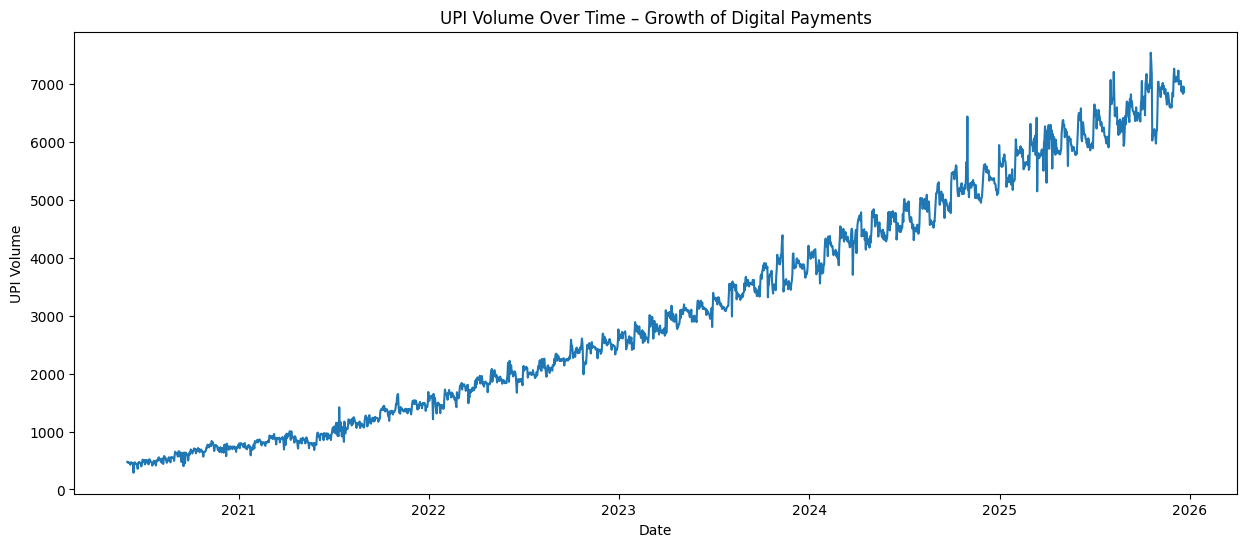

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(system["date"], system["upi_volume"])
plt.title("UPI Volume Over Time – Growth of Digital Payments")
plt.xlabel("Date")
plt.ylabel("UPI Volume")
plt.show()

### 2: Growth & Volatility (Normal Behavior)

In [ ]:

system["Volume_Growth"] = system["upi_volume"].pct_change()
system["Value_Growth"]  = system["upi_value"].pct_change()

system["Rolling_Mean_Growth"] = system["Volume_Growth"].rolling(100).mean()
system["Rolling_Volatility"]  = system["Volume_Growth"].rolling(100).std()


system.to_csv("growth_volatility.csv", index=False)

"UPI growth fluctuates around a stable mean, punctuated by episodic shocks.”

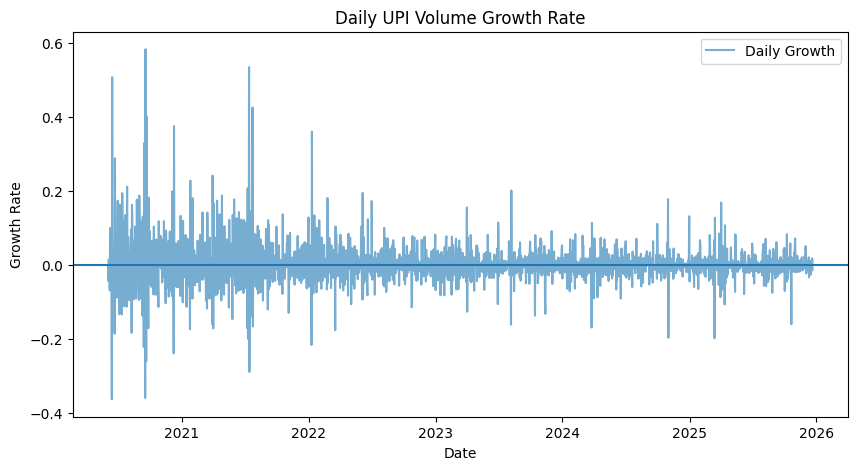

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(system["date"], system["Volume_Growth"], alpha=0.6, label="Daily Growth")
plt.axhline(0)
plt.title("Daily UPI Volume Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()


Rolling Mean Growth

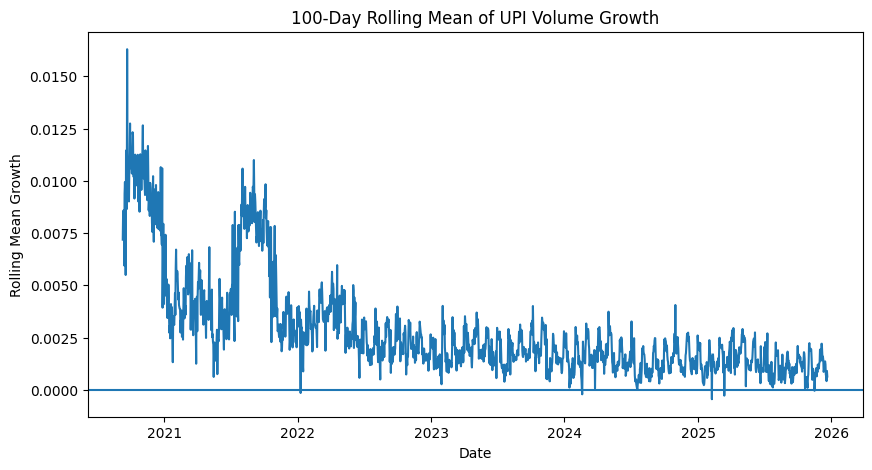

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(system["date"], system["Rolling_Mean_Growth"])
plt.axhline(0)
plt.title("100-Day Rolling Mean of UPI Volume Growth")
plt.xlabel("Date")
plt.ylabel("Rolling Mean Growth")
plt.show()


### STL Decomposition (Trend vs Seasonality)

STL (Seasonal-Trend decomposition using Loess) is a powerful technique that breaks down time series data into three key parts: a **Trend** (long-term direction), **Seasonality** (repeating cycles like holidays), and **Residuals** (random noise), using locally weighted regression (Loess) for robust, flexible analysis that adapts to changing patterns, unlike older methods.



In [ ]:
stl = STL(system.set_index("date")["upi_volume"], period=7, robust=True)
res = stl.fit()

system["Trend"] = res.trend.values
system["Seasonal"] = res.seasonal.values
system["Residual"] = res.resid.values

system.to_csv("stl_components.csv", index=False)


Trend Plot

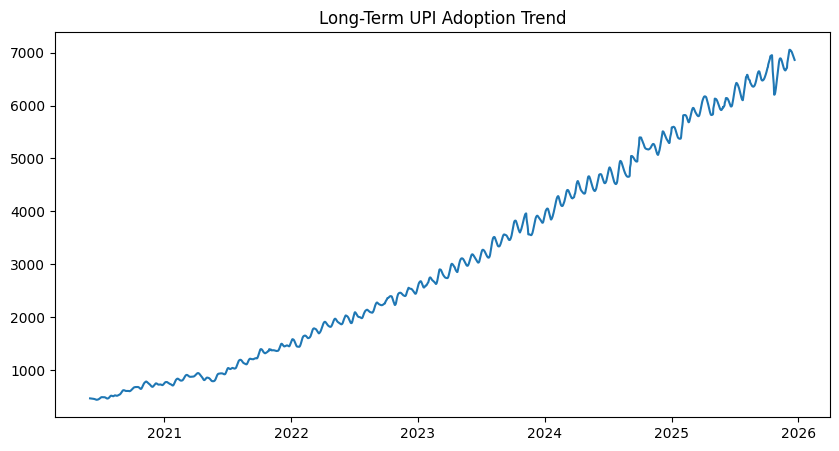

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(system["date"], system["Trend"])
plt.title("Long-Term UPI Adoption Trend")
plt.show()


Seasonality Plot

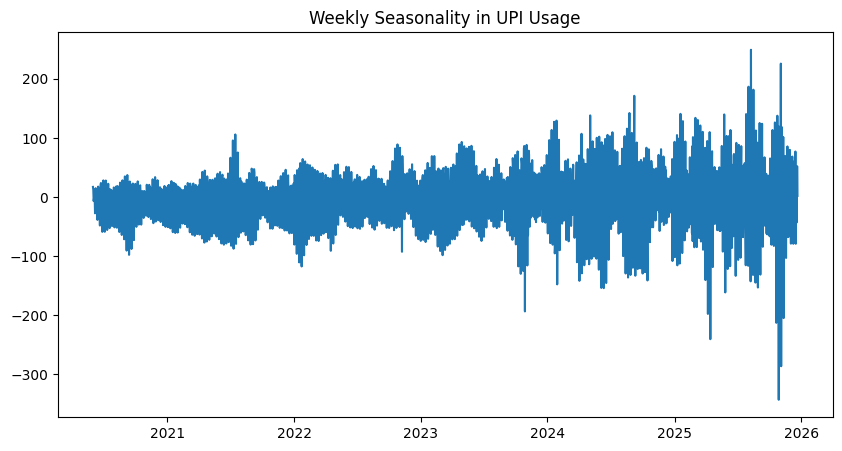

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(system["date"], system["Seasonal"])
plt.title("Weekly Seasonality in UPI Usage")
plt.show()


## Anomaly Dectection (Residual based)

In [ ]:
resid_std = system["Residual"].std()
system["STL_Anomaly"] = system["Residual"].abs() > 3 * resid_std

anomalies = system[system["STL_Anomaly"]]
anomalies.to_csv("anomalies.csv", index=False)


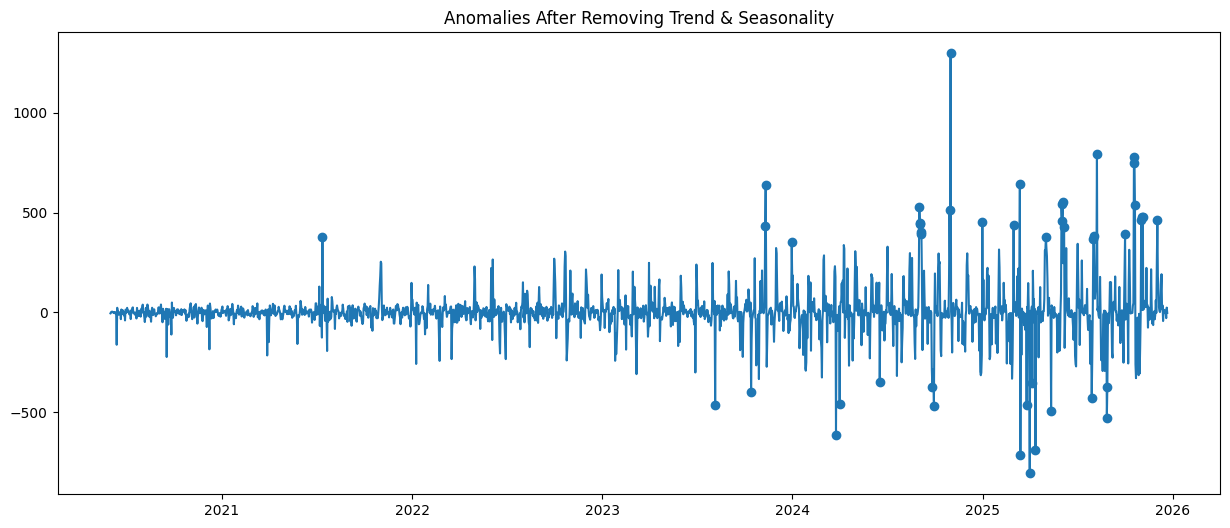

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(system["date"], system["Residual"])
plt.scatter(anomalies["date"], anomalies["Residual"])
plt.title("Anomalies After Removing Trend & Seasonality")
plt.show()


## 5: Volume–Value Decoupling (Structural Insight)

In [ ]:
system["Growth_Diff"] = system["Value_Growth"] - system["Volume_Growth"]

system["Decoupling_Event"] = (system["Growth_Diff"].abs() >3 * system["Growth_Diff"].std())

system.to_csv("volume_value_decoupling.csv", index=False)


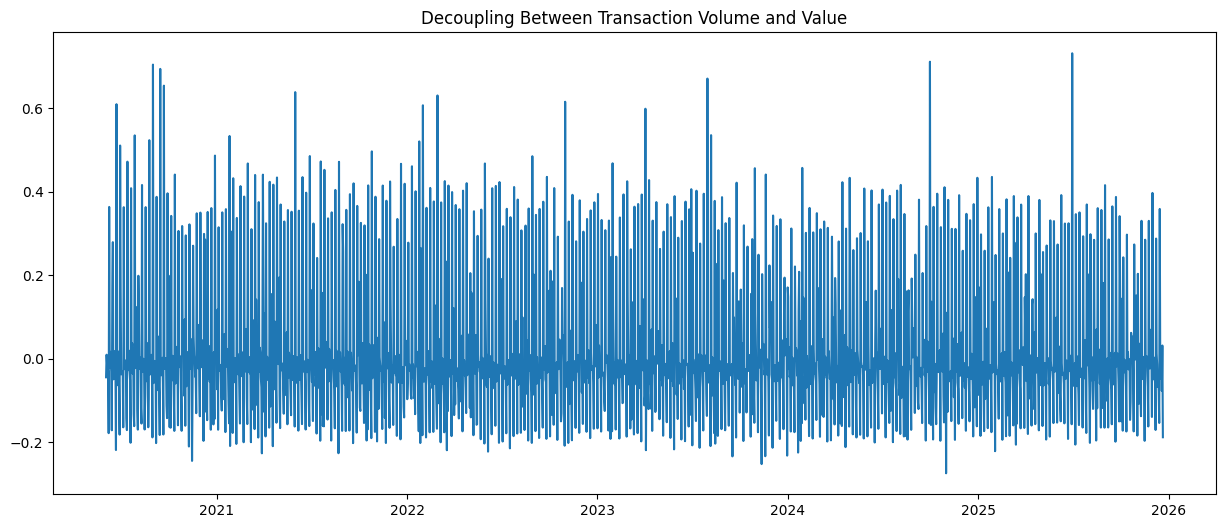

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(system["date"], system["Growth_Diff"])
plt.title("Decoupling Between Transaction Volume and Value")
plt.show()


## Stability or maturity index

In [ ]:
system["Stability_Index"] = 1 / (1 + system["Rolling_Volatility"])
system.to_csv("stability_index.csv", index=False)


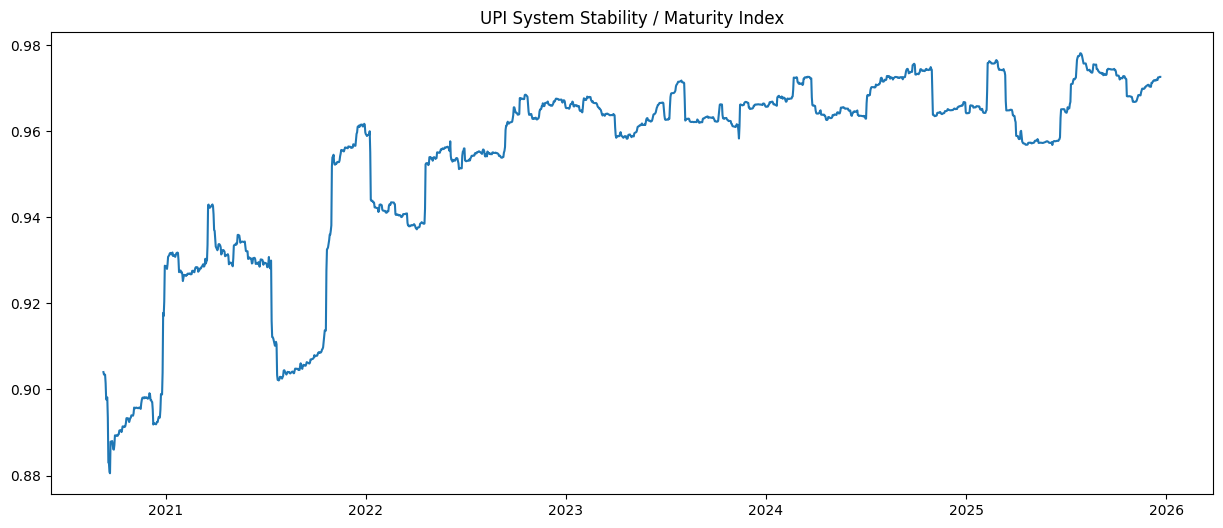

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(system["date"], system["Stability_Index"])
plt.title("UPI System Stability / Maturity Index")
plt.show()


### Drop Detection (z- score)

In [ ]:
mean_growth = system["Volume_Growth"].mean()
std_growth  = system["Volume_Growth"].std()

system["Growth_Z"] = (
    (system["Volume_Growth"] - mean_growth) / std_growth
)


In [ ]:
Z_THRESHOLD = 3

system["Growth_Drop"] = system["Growth_Z"] < -Z_THRESHOLD
system["Growth_Surge"] = system["Growth_Z"] > Z_THRESHOLD


In [ ]:
zscore_df = system[
    ["date", "upi_volume", "Volume_Growth", "Growth_Z",
     "Growth_Drop", "Growth_Surge"]
]

zscore_df.to_csv("growth_zscore_anomalies.csv", index=False)


“This plot highlights statistically significant deviations in UPI growth rates, identifying abrupt drops and surges relative to historical behavior.”

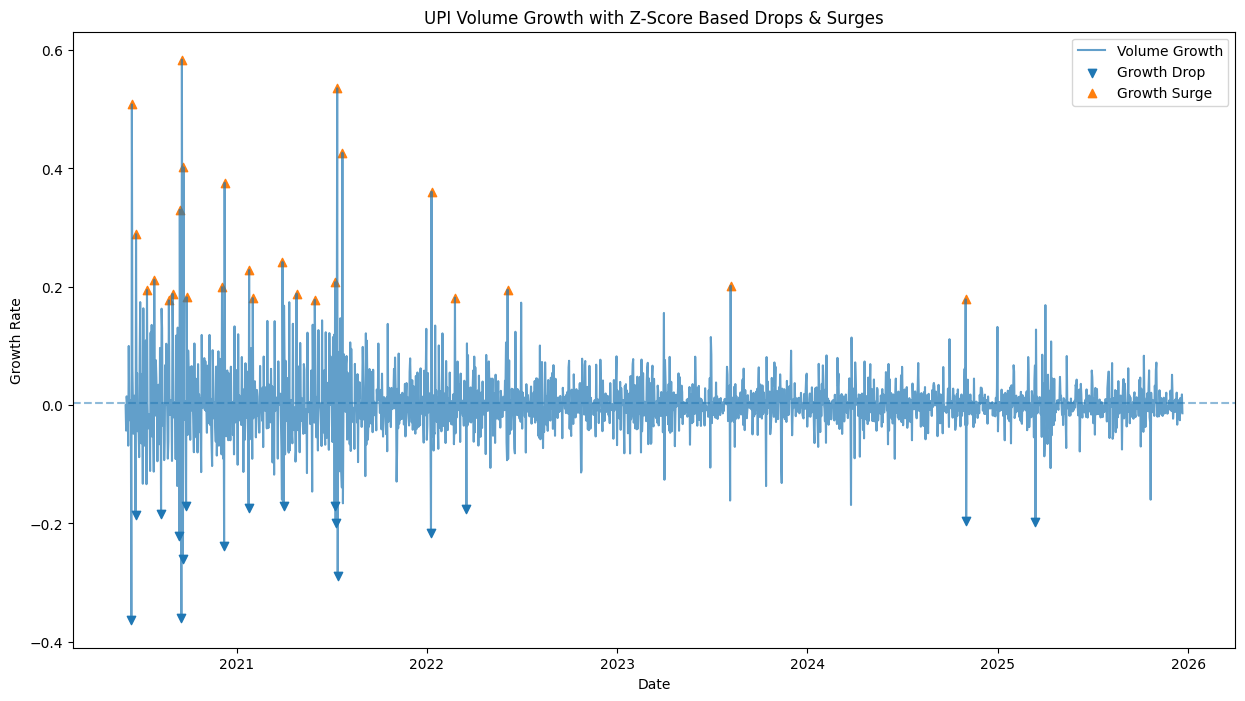

In [ ]:

plt.figure(figsize=(15, 8))

plt.plot(system["date"],system["Volume_Growth"],label="Volume Growth",alpha=0.7)

plt.scatter(system.loc[system["Growth_Drop"],"date"],system.loc[system["Growth_Drop"], "Volume_Growth"],label="Growth Drop",marker="v")

plt.scatter(system.loc[system["Growth_Surge"], "date"],system.loc[system["Growth_Surge"], "Volume_Growth"],label="Growth Surge",marker="^")

plt.axhline(mean_growth, linestyle="--", alpha=0.5)
plt.title("UPI Volume Growth with Z-Score Based Drops & Surges")
plt.xlabel("Date")
plt.ylabel("Growth Rate")
plt.legend()
plt.show()


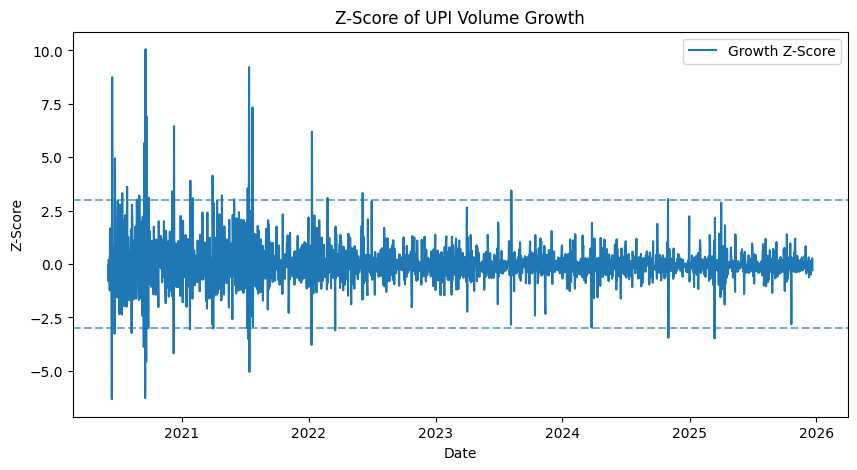

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(system["date"],system["Growth_Z"],label="Growth Z-Score")

plt.axhline(Z_THRESHOLD, linestyle="--", alpha=0.6)
plt.axhline(-Z_THRESHOLD, linestyle="--", alpha=0.6)

plt.title("Z-Score of UPI Volume Growth")
plt.xlabel("Date")
plt.ylabel("Z-Score")
plt.legend()
plt.show()
